In [54]:
from keras.datasets import mnist

In [55]:
# Carregando o dataset separando os dados de treino e de teste 
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [56]:
# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
from keras.utils import to_categorical
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

In [57]:
# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para achatar as imagens
x_treino_flat = x_treino_norm.reshape(len(x_treino_norm), 28*28)
x_teste_flat = x_teste_norm.reshape(len(x_teste_norm), 28*28)


In [58]:
# Importação das bibliotecas necessárias para treinar a rede
from keras.models import Sequential
from keras.layers import Dense


In [59]:
# Criação do modelo linear
model = Sequential()
# Neumronios, ativação, input_shape
model.add(Dense(10, activation='softmax', input_shape=(28*28,)))

In [60]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=adam)


In [62]:
historico = model.fit(x_treino_flat, y_treino_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7933 - loss: 0.0325 - val_accuracy: 0.9155 - val_loss: 0.0134
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9101 - loss: 0.0143 - val_accuracy: 0.9230 - val_loss: 0.0121
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9214 - loss: 0.0124 - val_accuracy: 0.9242 - val_loss: 0.0116
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9277 - loss: 0.0115 - val_accuracy: 0.9281 - val_loss: 0.0112
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9279 - loss: 0.0115 - val_accuracy: 0.9294 - val_loss: 0.0110
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9291 - loss: 0.0111 - val_accuracy: 0.9298 - val_loss: 0.0108
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9343 - loss: 0.0105 - val_accuracy: 0.9316 - val_loss: 0.0109
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9323 - loss: 0.0107 - 

Text(0, 0.5, 'acuracia')

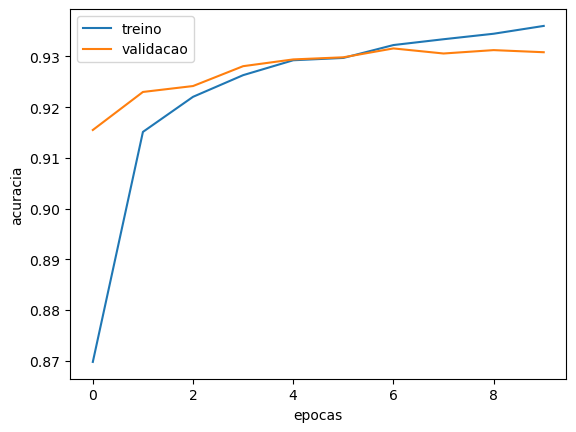

In [63]:
from matplotlib import pyplot as plt

# Exibe o histórico do treinamento
# Graficos de perda e acurácia
# Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

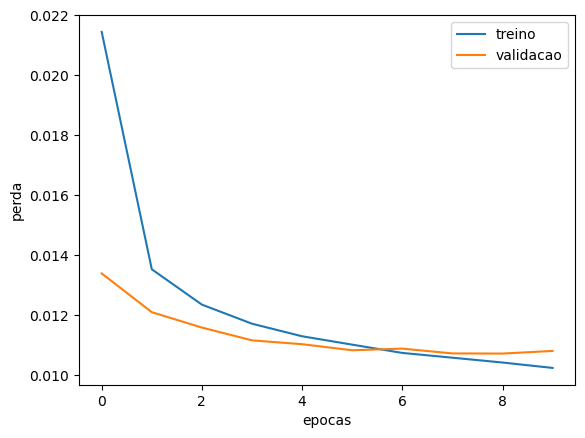

In [64]:
# Perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

In [65]:
# Salva o modelo
model.save('modelo_mnist_linear.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


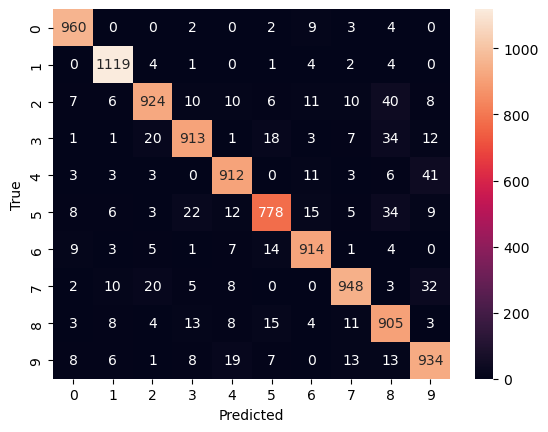

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(x_teste_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_teste_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:
# Realiza uma predição com o modelo
predicao = model.predict(x_teste_flat[0].reshape(1, 28*28))
print(predicao)

np.argmax(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[3.8705243e-06 5.5856995e-13 9.8504700e-07 5.4752792e-04 6.8855918e-08
  5.0279509e-06 3.1979364e-11 9.9934548e-01 3.9303927e-06 9.3191265e-05]]


7

In [68]:
import numpy as np
from keras.preprocessing import image

# Carrega a imagem
img_path = 'imgTest/sete.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Converte a imagem para um array numpy
img = image.img_to_array(img)

# Normaliza a imagem
img = img / 255.0

# Remodela a imagem para o formato esperado pelo modelo
img = img.reshape(1, 28*28)

# Faz a predição
predicao = model.predict(img)

# Exibe a predição
print(predicao)
print(np.argmax(predicao))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.2307355e-20 2.9838880e-31 4.4086872e-09 4.1479025e-09 6.3505307e-36
  1.0000000e+00 2.6038329e-17 1.1315217e-12 3.5202653e-17 7.0743490e-28]]
5
